In [135]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from scipy.stats import ttest_ind
import math
import random
import statsmodels.api as sm

print("Esperamos trabalhar no diretório")
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\mathe_000\Documents\GitHub\data-science-student\Projeto 3


De maneira bastante simplificada, a técnica estatística chamada de regressão nada mais é do que uma
ferramenta que costuma ser bastante empregada quando se objetiva modelar o efeito que algumas
variáveis exercem nas outras (no geral, uma variável em função de outras). Basicamente, este estudo
consiste na construção e análise de uma relação matemática entre as tais variáveis de interesse.
Na terminologia de regressão, a variável que se deseja estudar (efeito) é chamada de variável
dependente ou resposta. Já as variáveis que são usadas para explicar a variável dependente são
chamadas de regressores, de variáveis independentes ou de variáveis explicativas (causas). Dessa forma,
a análise de regressão consiste em estudar como alterações nas variáveis explicativas influenciam o
comportamento médio da variável resposta.
O tipo mais simples de análise de regressão, chamado de regressão linear simples, envolve uma variável
explicativa (comumente chamada de X) e uma variável resposta (comumente chamada de Y). Aqui, vale
ressaltar que o termo regressão linear significa regressão linear nos parâmetros.

a)$y_i = \beta_0 + \beta_1 x_i + e_i \,\!$

$S(\beta_0,\beta_1) = \sum_{i=1}^n \left( y_i - \beta_0 - \beta_1 x_i \right) ^2$

Aplicando a regra da cadeia para a derivada parcial sobre os eixos:

$\begin{align}
{\partial S \over \partial \beta_0} & = {\partial S \over \partial x}*{\partial x \over \partial \beta_0}\\
{\partial S \over \partial x} & =  2\sum_{i=1}^n \left( y_i - \beta_0 - \beta_1 x_i \right)\\
{\partial x \over \partial \beta_0} & = -1\\
{\partial S \over \partial \beta_0} & =  2\sum_{i=1}^n \left( y_i - \beta_0 - \beta_1 x_i \right) * -1 = 0 \\
{\partial S \over \partial \beta_0} & = -2 \sum_{i=1}^n \left( y_i - \beta_0 - \beta_1 x_i \right) = 0 \\
{\partial S \over \partial \beta_1} & = -2 \sum_{i=1}^n x_i \left( y_i - \beta_0 - \beta_1 x_i \right) = 0 \\
\end{align}$

Dividindo por $2n \,\!$ e distrbuindo

$\begin{align}
& \frac{-2 \sum_{i=1}^n y_i} {2n} + \frac{2 \sum_{i=1}^n \beta_0} {2n} + \frac{2 \sum_{i=1}^n \beta_1 x_i} {2n} = \frac{0} {2n} \\
& \frac{-\sum_{i=1}^n y_i} {n} + \frac{\sum_{i=1}^n \beta_0} {n} + \frac{\beta_1 \sum_{i=1}^n x_i} {n} = 0 \\
& -\bar{y} + \beta_0 + \beta_1 \bar{x} = 0 \\
& \beta_0 = \bar{y} - \beta_1 \bar{x}
\end{align}$

Em que $\bar{y}$ é a Média Amostral de $y \,\!$ e $\bar{x}$ é a Média Amostral de $x \,\!$

$\begin{align}
& -2 \sum_{i=1}^n x_i \left(y_i - \bar{y} + \beta_1 \bar{x} - \beta1 x_i \right) = 0 \\
& \sum_{i=1}^n \left[ x_i \left( y_i - \bar{y} \right) + x_i \beta1 \left( \bar{x} - x_i \right) \right] = 0 \\
& \sum_{i=1}^n x_i \left( y_i - \bar{y} \right) + \beta_1 \sum_{i=1}^n x_i \left( \bar{x} - x_i \right) = 0 \\
& \beta_1 = \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right) \left( y_i - \bar{y} \right)} {\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}
\end{align}$

In [124]:
ENERGY_SUPPLY = pd.read_excel('Indicator_Energysupply per capita.xlsx')
ENERGY = pd.read_excel('energy use per person.xlsx')
VEHICLES = pd.read_excel('indicator Motor vehicles per 1000 population 20100824.xlsx')
CO2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')

In [274]:
CO2_2007= pd.DataFrame(np.log(CO2[pd.notnull(CO2[2007])][2007]))
VEHICLES_2007= pd.DataFrame(np.log(VEHICLES[pd.notnull(VEHICLES[2007])][2007]))
ENERGY_2007= pd.DataFrame(np.log(ENERGY[pd.notnull(ENERGY["2007"])]["2007"]))
ENERGY_SUPPLY_2010= pd.DataFrame(np.log(ENERGY_SUPPLY[pd.notnull(ENERGY_SUPPLY[2010])][2010]))
CO2_2007 = CO2_2007.rename(columns={2007: 'CO2_2007'})
VEHICLES_2007 = VEHICLES_2007.rename(columns={2007: 'VEHICLES_2007'})
ENERGY_2007 = ENERGY_2007.rename(columns={"2007": 'ENERGY_2007'})
ENERGY_SUPPLY_2010 = ENERGY_SUPPLY_2010.rename(columns={2010: 'ENERGY_SUPPLY_2010'})

df1 = pd.concat([CO2_2007,VEHICLES_2007,ENERGY_2007,ENERGY_SUPPLY_2010],axis=1, join='inner')

##Teste de Correlação (OLS)

In [285]:
result = sm.formula.ols(formula="CO2_2007 ~ VEHICLES_2007 + ENERGY_2007 + ENERGY_SUPPLY_2010",data=df1).fit()
print (result.params)
result.summary()

Intercept            -0.213838
VEHICLES_2007         0.196548
ENERGY_2007           0.484190
ENERGY_SUPPLY_2010   -0.044378
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CO2_2007   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     4.110
Date:                Sat, 28 Nov 2015   Prob (F-statistic):             0.0100
Time:                        20:06:44   Log-Likelihood:                -123.28
No. Observations:                  66   AIC:                             254.6
Df Residuals:                      62   BIC:                             263.3
Df Model:                           3                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.2138      0.603     -0.355      0.724        -1.418     0.991
VEHICLES_2007          0.1965      0.128      1.534      0.130        -0.060     0.453
ENERGY_2007            0.4842      0.148      3.275      0.002         0.189     0.780
ENERGY_SUPPLY_2010    -0.0444      0.198     -0.224      0.823        -0.440     0.351
==============================================================================
Omnibus:                       28.196   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.214
Skew:                          -1.347   Prob(JB):                     1.14e-14
Kurtosis:                       7.011   Cond. No.                         15.4
==============================================================================
"""

In [276]:
from pandas.stats.api import ols
ols(y=df1['CO2_2007'], x=df1[['VEHICLES_2007','ENERGY_2007','ENERGY_SUPPLY_2010']])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <VEHICLES_2007> + <ENERGY_2007> + <ENERGY_SUPPLY_2010>
             + <intercept>

Number of Observations:         66
Number of Degrees of Freedom:   4

R-squared:         0.1659
Adj R-squared:     0.1255

Rmse:              1.6164

F-stat (3, 62):     4.1100, p-value:     0.0100

Degrees of Freedom: model 3, resid 62

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
 VEHICLES_2007     0.1965     0.1281       1.53     0.1301    -0.0546     0.4477
   ENERGY_2007     0.4842     0.1479       3.27     0.0017     0.1944     0.7740
ENERGY_SUPPLY_2010    -0.0444     0.1979      -0.22     0.8233    -0.4323     0.3436
     intercept    -0.2138     0.6026      -0.35     0.7239    -1.3949     0.9672
------------

##Interpretação dos dados do teste de Correlação #1

###P-Value (P>|t|)
A partir de uma análise direta do **p-value**, que indica o teste da hipótese nula de que o coef. é igual a zero, se conseiderarmos **alpha**(valor de significância estatística) como o padrão de **5%** (0.05) podemos considerar os valores de **ENERGY_SUPPLY_2010** e **VEHICLES_2007** estatísticamente irrelevantes.

Para termos de análise, consideremos nosso **alpha = 0.15**, assim, na nova iteração, manteremos ambos **ENERGY_2007** e **VEHICLES_2007**

In [283]:
result = sm.formula.ols(formula="CO2_2007 ~ VEHICLES_2007 + ENERGY_2007",data=df1).fit()
print (result.params)
result.summary()

Intercept       -0.190949
VEHICLES_2007    0.187730
ENERGY_2007      0.483093
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CO2_2007   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     6.234
Date:                Sat, 28 Nov 2015   Prob (F-statistic):            0.00339
Time:                        19:57:30   Log-Likelihood:                -123.31
No. Observations:                  66   AIC:                             252.6
Df Residuals:                      63   BIC:                             259.2
Df Model:                           2                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -0.1909      0.589     -0.324      0.747        -1.369     0.987
VEHICLES_2007     0.1877      0.121      1.551      0.126        -0.054     0.430
ENERGY_2007       0.4831      0.147      3.294      0.002         0.190     0.776
==============================================================================
Omnibus:                       28.604   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.237
Skew:                          -1.360   Prob(JB):                     4.14e-15
Kurtosis:                       7.085   Cond. No.                         15.0
==============================================================================
"""

In [278]:
from pandas.stats.api import ols
ols(y=df1['CO2_2007'], x=df1[['VEHICLES_2007','ENERGY_2007']])


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <VEHICLES_2007> + <ENERGY_2007> + <intercept>

Number of Observations:         66
Number of Degrees of Freedom:   3

R-squared:         0.1652
Adj R-squared:     0.1387

Rmse:              1.6042

F-stat (2, 63):     6.2338, p-value:     0.0034

Degrees of Freedom: model 2, resid 63

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
 VEHICLES_2007     0.1877     0.1210       1.55     0.1258    -0.0495     0.4249
   ENERGY_2007     0.4831     0.1467       3.29     0.0016     0.1956     0.7705
     intercept    -0.1909     0.5894      -0.32     0.7470    -1.3461     0.9642
---------------------------------End of Summary---------------------------------

##Interpretação dos dados do teste de Correlação #2

Após a análise dos P-Value e das conclusões sobre significancia estatística, deve-se analisar outros valores frutos da análise estatística.

###Ponto de intersecção com o eixo Y (Intercept)
Não há muito sobre essa variável ela realmente indica o ponto de intersecção no eixo das ordenadas. Portanto, o **b** na equação da reta: f(x) = ax + **b** .

###R-Quadrado (R-Squared:)
Também conhecido como coeficiente de determinação(coefficient of determination) o R-quadrado indica o quanto dos dados se aproximam da linha ajustada de regressão (fitted regression line).

O R-quadrado representa a porcentagem da resposta da variação variável(x) do modelo linear, ou seja:

$R^2=\frac{SQ_\text{exp}}{SQ_\text{tot}}=1-\frac{SQ_\text{res}}{SQ_\text{tot}}$

Variando de 0% até 100%:

>0% indica que o modelo não explica de forma alguma a variabilidade das respostas em torno de sua média.

>100% indica qu eo modelo explica toda a variabilidade das respostas em torno da média.

Contudo, o R-quadrado, não permite determinar se tealmente existe uma tendência, assim, um R-Quadrado alto não indica um modelo que se ajusta perfeitamente aos dados, assim como um baixo não indica que definitivamente não se adequa.

Com uma influência(R-quadrado) de somente **0.165**, ainda pode-se tirar conclusões importantes desses dados, independentemente da influência realtivamente baixa na correlação.

###R-Quadrado Ajustado (Adj. R-squared:)
O R-quadrado ajustado (Adjusted R-squared) normaliza a variação do R-quadrado. Com uma presmissa simples, 

>Quando se aumenta o número de variáveis que causam impacto na correlação, seu R-quadrado aumenta por que sua capacidade predição melhorou? ou somente porque aumentou o número de variáveis?

Então o R-quadrado ajustado trabalha aumentando o seu valor caso o número de variáveis aumente e R-quadrado aumente mais do que valor esperado, por outro lado dimunui se o valor de R-quardrado aumentar menos do que o valor esperado.

Uma valor de R-quadrado igual a **0.139** indica que a adição de uma segunda variável ao conjunto das variáveis preditivas implicou em um aumento menor do que o esperado para o modelo. Uma vez que **0.139** < **0.165**.

###Teste-F (F-statistic:)
Também conhecido como estatística-F, consiste em um teste que diferentemente do do teste-t (estatística-t) pode prever a significância do modelo para mais de uma variável. Contudo, a estatística-F não trabalha com as variáveis preditoras, ou seja, y (**CO2_2007**), assim assume um modelo que só possui intercepto.

O teste-F assume como hipóteses:

>Hipótese nula: O modelo que somente possui intercepto é igual ao modelo analisado.

>Hipótese alternativa: O ajuste do modelo que somente possui intercepto é significantemente reduzido quando comparado com o modelo analisado.

O que indica a significância dos dados analisados, ou seja, mesmo com fatores que indicam que seu modelo tem um bom ajuste, o **Teste-F comparado ao seu P-value** indica a significancia do modelo, descrita na variável **(Prob (F-statistic):)** no caso igual a **0.00339**. Portanto, mesmo com a significância de 5% ainda seria significativo, demonstrando um fator de não-aleatoriedade do modelo.

###O Critério de Informação de Akaike (AIC:) & O Critério de Informação Bayesiano (BIC)
Ambos o AIC quanto o BIC aumentam conforme SQE aumenta, assim uma vez que o SQE tende a diminuir conforme aumenta-se o número de variáveis analisadas no modelo, esses valores ficam menores. Assim deve-se encontrar um balanço entre o aumento no número de variáveis e o valor de AIC e BIC. 

Existe um universo a ser explorado por trás destas duas variáveis. Contudo, somente um breve resumo foi apresentado, já que este não é o intuito deste documento, mais informações em:

https://en.wikipedia.org/wiki/Akaike_information_criterion

https://en.wikipedia.org/wiki/Bayesian_information_criterion


###Erro Padrão (std err)
Também conhecido como Erro padrão da regressão, o Erro padraõ indica o quão errada está seu modelo de regressão. Valores menores associados ao Erro Padrão indicam que seus dados estão mais proximos da linha ajustada, dados na unidade das variáveis.

Diferentemente do R-Quadrado, o Erro padrão pode ser usado como um excelente estimador para seus dados já que ele indica que 95% dos dados está a uma distância de mais ou menos duas vezes o erro padrão de sua linha ajustada.

Para a regressão analisada **0.121** para **VEHICLES_2007** e **0.147** para **ENERGY_2007**. Indicam a distância de 95% dos dados no modelo de regressão.

###Coeficientes de Correlação (Coef.)
Representa a mudança média na resposta da variável para cada unidade do preditor(**CO2_2007**). Esse fator demonstra o quanto cada uma das variáveis está influenciando no sistema.

>Observe que mais uma vez a exclusão da variável **ENERGY_SUPPLY_2010** foi apoiada, já que seu coef. de correlação. era igual a **-0.044378** o que indica que estava influênciando negativamente no modelo de correlação.



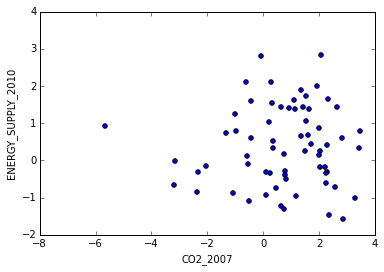

In [272]:
df1.plot(kind='scatter', x='CO2_2007', y='ENERGY_SUPPLY_2010');